1.Load the data and libraries
2.Data prepartion and preprocessing
3.Data Visulization
4.Data analysis
          1.Uni-variate
          2.Bi-variate
          3.Multi_variate
              Linear Regression
              Decision Tree Regressor



              



Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score

*Load* the data


In [ ]:
prices=pd.read_csv('/content/HousePrices.csv')

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [ ]:
prices.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
prices.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Exploratory Data Analysis

Univariate Analysis for Continuous Variables

<ipython-input-6-787ce6cb965a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['EnclosedPorch'],kde= True)


<Axes: xlabel='EnclosedPorch', ylabel='Density'>

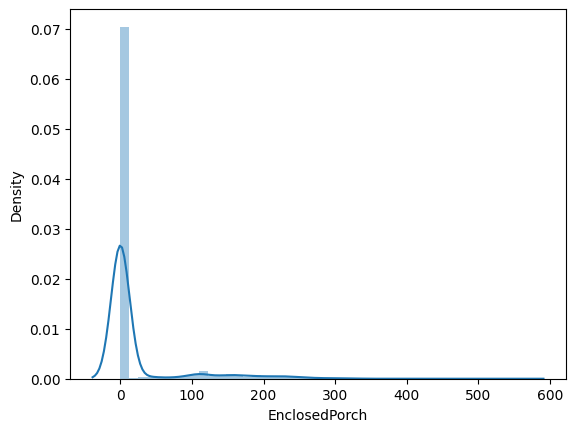

In [ ]:
sns.distplot(prices['EnclosedPorch'],kde= True)

In [ ]:
numerical_prices = prices.select_dtypes(include=['float', 'int'])
numerical_prices.skew(axis=0)

,0
Id,-0.033712
Dwell_Type,40.872292
LotFrontage,3.448015
LotArea,11.239413
OverallQual,0.196350
OverallCond,0.649335
YearBuilt,-0.516261
YearRemodAdd,-0.579862
MasVnrArea,2.576900
BsmtFinSF1,1.468890


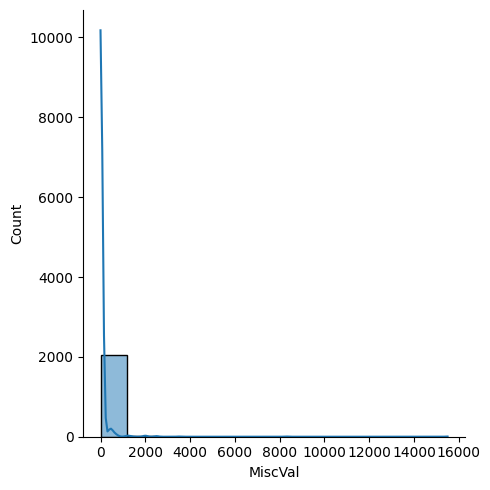

In [ ]:
sns.displot(prices['MiscVal'],kde=True)

<ipython-input-12-ff252f0fbe5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['OverallQual'],kde=True)


<Axes: xlabel='OverallQual', ylabel='Density'>

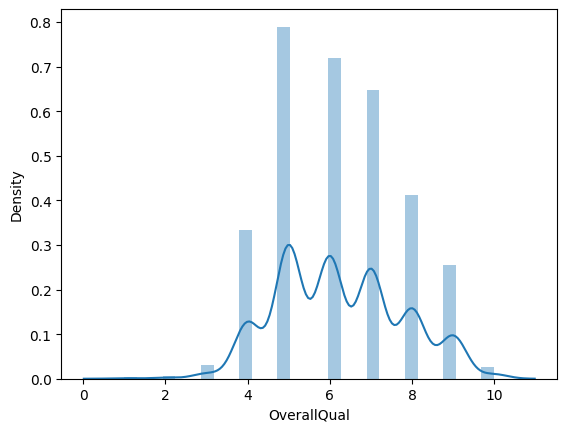

In [ ]:
sns.distplot(prices['OverallQual'],kde=True)

<ipython-input-13-4ea27f74b2fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['BsmtFinSF2'],kde=True)


<Axes: xlabel='BsmtFinSF2', ylabel='Density'>

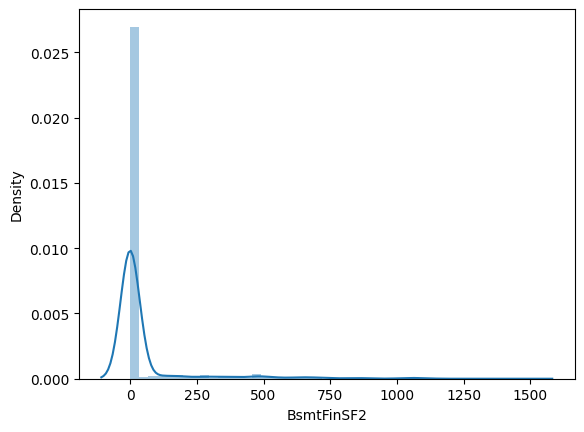

In [ ]:
sns.distplot(prices['BsmtFinSF2'],kde=True)

<ipython-input-14-55d114dad1b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['PoolArea'],kde=True)


<Axes: xlabel='PoolArea', ylabel='Density'>

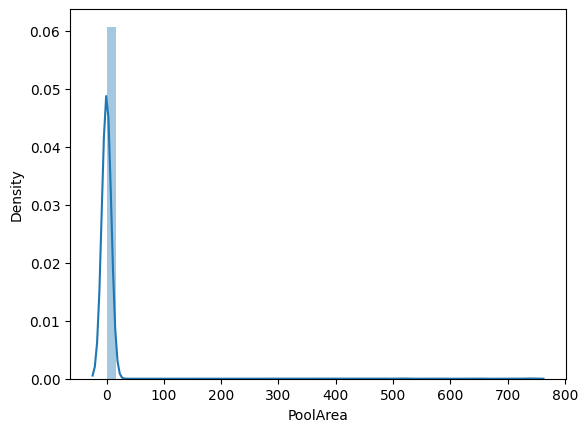

In [ ]:
sns.distplot(prices['PoolArea'],kde=True)

Univariate Analysis for Categorical Variables

<Axes: xlabel='LotConfig'>

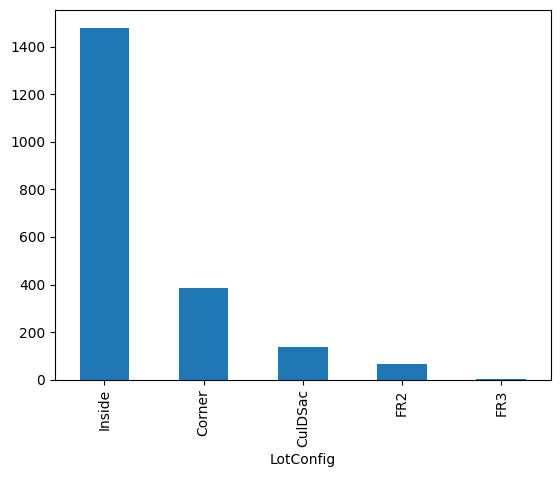

In [ ]:
prices['LotConfig'].value_counts().plot(kind='bar')

<Axes: xlabel='Dwelling_Type'>

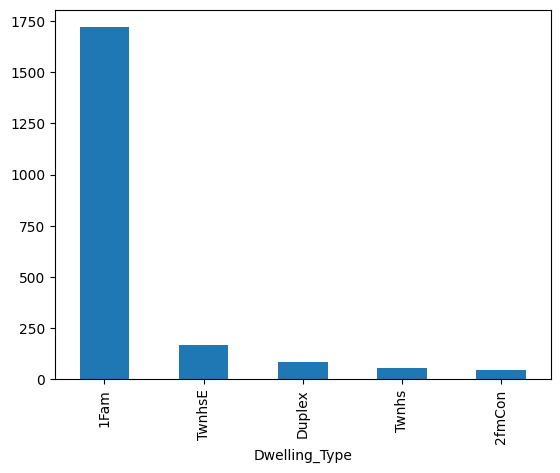

In [ ]:
prices['Dwelling_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='BsmtQual'>

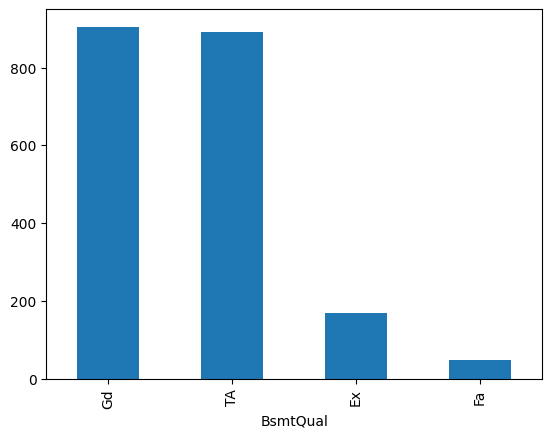

In [ ]:
prices['BsmtQual'].value_counts().plot(kind='bar')

<Axes: xlabel='GarageType'>

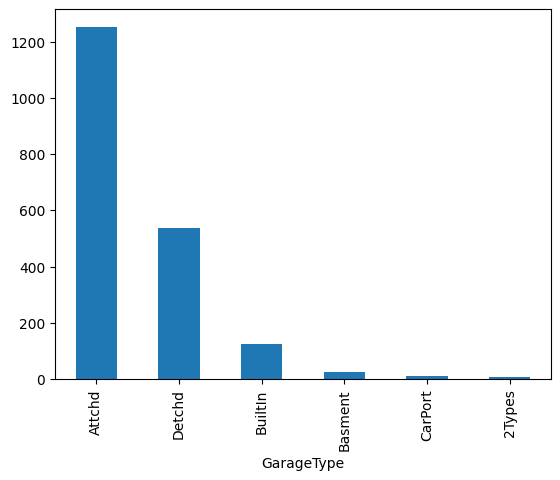

In [ ]:
prices['GarageType'].value_counts().plot(kind='bar')

<Axes: xlabel='Foundation'>

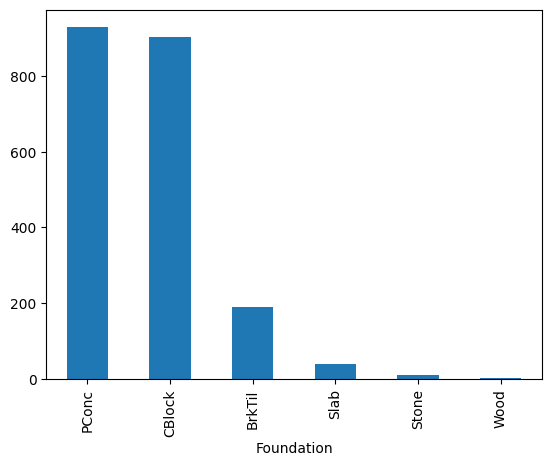

In [ ]:
prices['Foundation'].value_counts().plot(kind='bar')

Bivariate Analysis

Correlation

In [ ]:
sns.heatmap(prices)

ValueError: could not convert string to float: 'RL'

Chi square test

1.Property Shape and RoofMatl

In [ ]:
prices['Property_Shape'].value_counts()

,count
Property_Shape,
Reg,1300
IR1,698
IR2,60
IR3,15


In [ ]:
prices['RoofMatl'].value_counts()

,count
RoofMatl,
CompShg,2036
Tar&Grv,17
WdShngl,10
WdShake,6
Metal,1
Membran,1
Roll,1
ClyTile,1


In [ ]:
pd.crosstab(prices['Property_Shape'],prices['RoofMatl'])

RoofMatl,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
Property_Shape,,,,,,,,
IR1,0,677,1,1,0,10,3,6
IR2,0,55,0,0,0,4,0,1
IR3,1,14,0,0,0,0,0,0
Reg,0,1290,0,0,1,3,3,3


1.Null Hypothesis:Property Shape and RoofMatl are independent of each other







2.Alternate Hypothesis:Property Shape and RoofMatl are dependent of each other







In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def chi2_sq_test(var1,var2):
  table=pd.crosstab(var1,var2)
  _,p,_,_=chi2_contingency(table)
  if p<=0.05:
    print('Accept the Alternate Hypothesis',round(p,2))
  else:
    print('Accept the Null Hypothesis',round(p,2))
  return table

In [ ]:
chi2_sq_test(prices['Property_Shape'],prices['RoofMatl'])

Accept the Alternate Hypothesis 0.0


RoofMatl,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
Property_Shape,,,,,,,,
IR1,0,677,1,1,0,10,3,6
IR2,0,55,0,0,0,4,0,1
IR3,1,14,0,0,0,0,0,0
Reg,0,1290,0,0,1,3,3,3


Inference:


*  PropertyShape and RoofMatl are dependent of each other
*  P value=0



2.HouseStyle and Foundation

In [ ]:
chi2_sq_test(prices['HouseStyle'],prices['Foundation'])

Accept the Alternate Hypothesis 0.0


Foundation,BrkTil,CBlock,PConc,Slab,Stone,Wood
HouseStyle,,,,,,
1.5Fin,69,100,38,4,1,2
1.5Unf,8,4,4,0,0,0
1Story,54,509,442,29,2,0
2.5Fin,5,2,3,0,0,0
2.5Unf,9,5,2,0,0,0
2Story,46,175,403,6,7,1
SFoyer,0,45,8,1,0,0
SLvl,0,61,28,0,0,0


Inference:
House Style and Foundation are dependent of each other



3.Lot Config and Dwelling Type

In [ ]:
chi2_sq_test(prices['LotConfig'],prices['Dwelling_Type'])

Accept the Alternate Hypothesis 0.0


Dwelling_Type,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
LotConfig,,,,,
Corner,344,7,18,0,17
CulDSac,126,0,2,0,9
FR2,48,0,3,7,7
FR3,2,0,0,0,2
Inside,1199,37,64,48,133


Inference:
LotConfig and Dwelling_type are dependent of each other
p value=0

4.Foundation and GarageType

In [ ]:
chi2_sq_test(prices['Foundation'],prices['GarageType'])

Accept the Alternate Hypothesis 0.0


GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
Foundation,,,,,,
BrkTil,1,13,4,3,0,146
CBlock,7,532,15,14,10,259
PConc,0,686,7,106,0,108
Slab,0,13,0,1,2,20
Stone,0,6,0,0,0,4
Wood,0,2,1,0,0,0


Inference:
Foundation and Garage Type are dependent of each other
p value=0

5.Exterior1st and Exterior2nd

In [ ]:
chi2_sq_test(prices['Exterior1st'],prices['Exterior2nd'])

Accept the Alternate Hypothesis 0.0


Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior1st,,,,,,,,,,,,,,,,
AsbShng,21,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0
AsphShn,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkFace,1,0,0,34,0,0,5,0,0,0,7,5,1,0,18,1
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
CemntBd,0,0,0,0,0,84,0,0,0,0,0,0,0,0,1,2
HdBoard,0,1,0,0,0,0,269,2,1,0,36,0,0,0,3,4
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
MetalSd,0,1,0,0,0,0,5,0,297,0,0,0,2,0,2,1


Exterior1st and Exterior2nd are dependent of each other


> p value=0



Data Preparation

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

Handling missing values

In [ ]:
def data_prep(data):
  #Missing values
  data['MasVnrArea']=np.where(data['MasVnrArea'].isna(),data['MasVnrArea'].median(skipna=True),data['MasVnrArea'])
  data['BsmtQual']=np.where(data['BsmtQual'].isna(),data['BsmtQual'].mode(dropna=True)[0],data['BsmtQual'])
  data['BsmtCond']=np.where(data['BsmtCond'].isna(),data['BsmtCond'].mode(dropna=True)[0],data['BsmtCond'])
  data['BsmtExposure']=np.where(data['BsmtExposure'].isna(),data['BsmtExposure'].mode(dropna=True)[0],data['BsmtExposure'])
  data['BsmtFinType1']=np.where(data['BsmtFinType1'].isna(),data['BsmtFinType1'].mode(dropna=True)[0],data['BsmtFinType1'])
  data['BsmtFinType2']=np.where(data['BsmtFinType2'].isna(),data['BsmtFinType2'].mode(dropna=True)[0],data['BsmtFinType2'])
  data['Electrical']=np.where(data['Electrical'].isna(),data['Electrical'].mode(dropna=True)[0],data['Electrical'])
  data['MasVnrType']=np.where(data['MasVnrType'].isna(),data['MasVnrType'].mode(dropna=True)[0],data['MasVnrType'])
  data['Years_of_Built']=2024-data['YearBuilt']
  data['YearRemodAdd']=2024-data['YearRemodAdd']
  data['YrSold']=2024-data['YrSold']
  data['GrLivArea']=2024-data['GrLivArea']
  #Dropping values   Poolqc fence MiscFeatures Id Alley GarageYrBlt LotFrontage FireplaceQu GarageType GarageFinish GarageQual GarageCond
  data.drop(['PoolQC','Fence', 'MiscFeature','Id','Alley','GarageYrBlt','LotFrontage','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond'],inplace = True, axis=1)
  #Datatype conversion
  data['MasVnrArea']=data['MasVnrArea'].astype('int')
  return data


In [ ]:
data_prep(prices)

,Dwell_Type,Zone_Class,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,Years_of_Built
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,16,WD,Normal,208500,21
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,17,WD,Normal,181500,48
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,16,WD,Normal,223500,23
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,18,WD,Abnorml,140000,109
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,12,16,WD,Normal,250000,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,60,RL,8755,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,...,168,0,0,0,6,15,WD,Normal,214000,88
2069,90,RL,7711,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,8,17,Oth,Abnorml,150000,88
2070,90,RL,25000,Pave,Reg,Low,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,6,17,WD,Normal,143000,41
2071,20,RL,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,...,0,233,0,0,1,15,COD,Abnorml,137500,66


In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Dwell_Type           2073 non-null   int64 
 1   Zone_Class           2073 non-null   object
 2   LotArea              2073 non-null   int64 
 3   Road_Type            2073 non-null   object
 4   Property_Shape       2073 non-null   object
 5   LandContour          2073 non-null   object
 6   Utilities            2073 non-null   object
 7   LotConfig            2073 non-null   object
 8   LandSlope            2073 non-null   object
 9   Neighborhood         2073 non-null   object
 10  Condition1           2073 non-null   object
 11  Condition2           2073 non-null   object
 12  Dwelling_Type        2073 non-null   object
 13  HouseStyle           2073 non-null   object
 14  OverallQual          2073 non-null   int64 
 15  OverallCond          2073 non-null   int64 
 16  YearBu

One hot encoding

In [ ]:
prices_enc=pd.get_dummies(prices)

In [ ]:
prices_enc.head()


,Dwell_Type,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,21,196,706,0,150,...,False,False,False,True,False,False,False,False,True,False
1,20,9600,6,8,1976,48,0,978,0,284,...,False,False,False,True,False,False,False,False,True,False
2,60,11250,7,5,2001,22,162,486,0,434,...,False,False,False,True,False,False,False,False,True,False
3,70,9550,7,5,1915,54,0,216,0,540,...,False,False,False,True,True,False,False,False,False,False
4,60,14260,8,5,2000,24,350,655,0,490,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
prices_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Columns: 250 entries, Dwell_Type to SaleCondition_Partial
dtypes: bool(214), int64(36)
memory usage: 1016.4 KB




> Dividing into Y and X



In [ ]:
y=prices_enc['Property_Sale_Price']
x=prices_enc.drop('Property_Sale_Price',axis=1)

In [ ]:
print(y.shape)
print(x.shape)

(2073,)
(2073, 249)




> Train Test Split



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=5)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1451, 249)
(1451,)
(622, 249)
(622,)


Multi-Variate Model

In [ ]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)

-57914.63025744501


In [ ]:
print(lr.coef_)

[ 2.75257858e+01  4.46652151e-01  9.28793124e+02  1.60928567e+03
  1.67023483e+01 -7.40137428e+01  1.88536735e+01  1.43190780e+01
  5.08265305e+00  3.40285106e-01  1.97420892e+01  1.72256436e+01
  2.92176614e+01 -3.81774433e+00 -4.26255221e+01 -4.96984039e+02
 -2.56841672e+01  3.54861892e+03  7.10318259e+02 -3.11427192e+03
 -2.06752298e+04  1.13813356e+02  3.25010033e+03 -1.21471170e+02
  2.96900532e+01  5.82433793e+00  1.25706983e+01 -2.66308923e+00
  2.92298709e+01  3.08756561e+01  1.00823733e+02 -3.27099548e-01
 -4.57402774e+02  1.67013703e+02 -1.67023311e+01 -2.81644861e+04
  5.70073588e+03  5.94939900e+03  9.56713659e+03  6.94721465e+03
 -1.57315891e+04  1.57315891e+04 -2.94552890e+03  1.17240525e+03
  3.64489919e+03 -1.87177554e+03  5.99055294e+02  4.77913602e+03
 -8.30558377e+03  2.92739246e+03  1.49901228e+04 -1.49901228e+04
  2.84681590e+03  9.18220528e+03 -6.36214738e+03 -6.70533642e+03
  1.03846261e+03  4.61776061e+03  6.51025288e+03 -1.11280135e+04
 -4.45934401e+03  4.40648

In [ ]:
for coef, feature in zip(lr.coef_, x_train.columns):
    print(f"{feature}: {coef:.2f}")  # Format to 2 decimal places

Dwell_Type: 27.53
LotArea: 0.45
OverallQual: 928.79
OverallCond: 1609.29
YearBuilt: 16.70
YearRemodAdd: -74.01
MasVnrArea: 18.85
BsmtFinSF1: 14.32
BsmtFinSF2: 5.08
BsmtUnfSF: 0.34
TotalBsmtSF: 19.74
1stFlrSF: 17.23
2ndFlrSF: 29.22
LowQualFinSF: -3.82
GrLivArea: -42.63
BsmtFullBath: -496.98
BsmtHalfBath: -25.68
FullBath: 3548.62
HalfBath: 710.32
BedroomAbvGr: -3114.27
KitchenAbvGr: -20675.23
TotRmsAbvGrd: 113.81
Fireplaces: 3250.10
GarageCars: -121.47
GarageArea: 29.69
WoodDeckSF: 5.82
OpenPorchSF: 12.57
EnclosedPorch: -2.66
3SsnPorch: 29.23
ScreenPorch: 30.88
PoolArea: 100.82
MiscVal: -0.33
MoSold: -457.40
YrSold: 167.01
Years_of_Built: -16.70
Zone_Class_C (all): -28164.49
Zone_Class_FV: 5700.74
Zone_Class_RH: 5949.40
Zone_Class_RL: 9567.14
Zone_Class_RM: 6947.21
Road_Type_Grvl: -15731.59
Road_Type_Pave: 15731.59
Property_Shape_IR1: -2945.53
Property_Shape_IR2: 1172.41
Property_Shape_IR3: 3644.90
Property_Shape_Reg: -1871.78
LandContour_Bnk: 599.06
LandContour_HLS: 4779.14
LandContour_

In [ ]:
y_hat_train=lr.predict(x_train)
y_hat_test=lr.predict(x_test)

In [ ]:
y_train #actual

,Property_Sale_Price
2,223500
1802,160200
1389,131000
1223,137900
344,85000
1367,127000
150,122000
734,108000
1946,168000
2013,335000


In [ ]:
y_hat_train #predicted

array([214625.52089055, 146984.45310158, 127942.02206192, ...,
       299798.57641391, 136191.15242136, 161533.00875163])

In [ ]:
rms_train=np.sqrt(mean_squared_error(y_train,y_hat_train))
print("The Rms for the model is",round(rms_train,2))

The Rms for the model is 20501.97


In [ ]:
rms_test=np.sqrt(mean_squared_error(y_test,y_hat_test))
print("The Rms for the model is",round(rms_test,2))

The Rms for the model is 30494.5


In [ ]:
r2_score_train=(r2_score(y_train,y_hat_train))
print("The R2_score for the model is",round(r2_score_train,2))

The R2_score for the model is 0.94


In [ ]:
r2_score_test=(r2_score(y_test,y_hat_test))
print("The R2_score for the model is",round(r2_score_test,2))

The R2_score for the model is 0.82


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
#fit the model
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
print("r2 score of the model for train data is:",round(r2_score(y_train,y_hat_train_dtree),2))


r2 score of the model for train data is: 1.0


In [ ]:
print("r2 score of the model for test data is:",round(r2_score(y_test,y_hat_test_dtree),2))


r2 score of the model for test data is: 0.76


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train_dtree))
print(round(rmse_train,2))

0.0


The rmse value for train is 0

In [ ]:
rmse_test_model = np.sqrt(mean_squared_error(y_test,y_hat_test_dtree))
print(round(rmse_test_model,2))


35558.3


The rmse value for test is 34596.47

Text(0.5, 1.0, 'tree for the prediction columns')

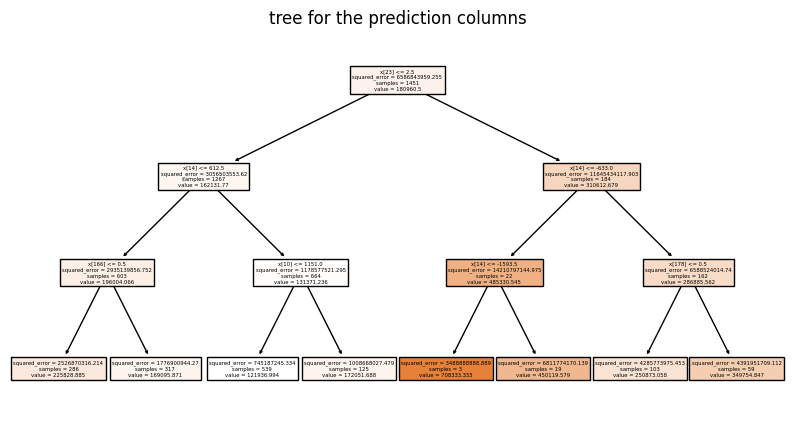

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
clf = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("tree for the prediction columns")


Feature Selection

In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)


,col_name
GarageCars,0.379630
GrLivArea,0.275175
ExterQual_TA,0.050677
TotalBsmtSF,0.047905
BsmtQual_Ex,0.038385
...,...
Condition2_PosN,0.000000
Condition2_RRAe,0.000000
Condition2_RRAn,0.000000
ExterCond_Po,0.000000


In [ ]:
feature_importances = dtree.feature_importances_
columns = x.columns
feature_importance_df = pd.DataFrame({'col_name': feature_importances}, index=columns)
zero_importance_df = feature_importance_df[feature_importance_df['col_name'] == 0]
print(zero_importance_df)


                    col_name
LowQualFinSF             0.0
3SsnPorch                0.0
PoolArea                 0.0
Zone_Class_C (all)       0.0
Zone_Class_FV            0.0
...                      ...
SaleType_Con             0.0
SaleType_ConLD           0.0
SaleType_ConLI           0.0
SaleType_ConLw           0.0
SaleType_Oth             0.0

[87 rows x 1 columns]


In [ ]:
zero_importance_df

,col_name
LowQualFinSF,0.0
3SsnPorch,0.0
PoolArea,0.0
Zone_Class_C (all),0.0
Zone_Class_FV,0.0
...,...
SaleType_Con,0.0
SaleType_ConLD,0.0
SaleType_ConLI,0.0
SaleType_ConLw,0.0


Linear Regression after Feature Selection

In [ ]:
prices_enc.drop(['3SsnPorch',
'MiscVal',
'Zone_Class_RH',
'Road_Type_Grvl',
'Road_Type_Pave',
'Property_Shape_IR3',
'LandContour_Bnk'	,
'Utilities_AllPub',
'Utilities_NoSeWa',
'LotConfig_FR3'	,
'LandSlope_Sev'	,
'Neighborhood_Blueste',
'Neighborhood_BrDale'	,
'Neighborhood_MeadowV',
'Condition1_PosA'	,
'Condition1_PosN'	,
'Condition1_RRAe'	,
'Condition1_RRAn'	,
'Condition1_RRNn'	,
'Condition2_Artery',
'Condition2_Feedr'	,
'Condition2_Norm'	,
'Condition2_PosA'	,
'Condition2_PosN'	,
'Condition2_RRAe',
'Condition2_RRAn'	,
'Condition2_RRNn'	,
'Dwelling_Type_Duplex',
'HouseStyle_2.5Fin',
'HouseStyle_SFoyer'	,
'RoofStyle_Flat'	,
'RoofStyle_Mansard',
'RoofStyle_Shed'	,
'RoofMatl_Membran',
'RoofMatl_Metal'	,
'RoofMatl_Roll'	,
'RoofMatl_Tar&Grv' ,
'RoofMatl_WdShake',
'RoofMatl_WdShngl',
'Exterior1st_AsbShng',
'Exterior1st_AsphShn'	,
'Exterior1st_BrkComm'	,
'Exterior1st_CBlock'	,
'Exterior1st_Stucco'	,
'Exterior2nd_AsphShn'	,
'Exterior2nd_CBlock'	,
'Exterior2nd_Other'	,
'Exterior2nd_Stone'	,
'Exterior2nd_Stucco',
'ExterCond_Ex',
'ExterCond_Fa',
'ExterCond_Po'	,
'Foundation_Slab',
'Foundation_Stone',
'Foundation_Wood'	,
'BsmtQual_Fa'	,
'BsmtCond_Gd'	,
'BsmtCond_Po'	,
'BsmtFinType2_ALQ',
'BsmtFinType2_GLQ',
'BsmtFinType2_Unf',
'Heating_Floor'	,
'Heating_GasW'	,
'Heating_OthW'	,
'Heating_Wall'	,
'HeatingQC_Fa'	,
'HeatingQC_Po'	,
'Electrical_Mix',
'Functional_Maj1'	,
'Functional_Maj2'	,
'Functional_Min1'	,
'Functional_Mod'	,
'Functional_Sev'	,
'SaleType_COD'	,
'SaleType_CWD',
'SaleType_Con',
'SaleType_ConLD',
'SaleType_ConLI',
'SaleType_ConLw',
'SaleType_New'	,
'SaleCondition_AdjLand'	,
'SaleCondition_Alloca'],inplace = True, axis=1)

In [ ]:
prices_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Columns: 168 entries, Dwell_Type to SaleCondition_Partial
dtypes: bool(134), int64(34)
memory usage: 822.0 KB


Dividing x and y

In [ ]:
y=prices_enc['Property_Sale_Price']
x=prices_enc.drop('Property_Sale_Price',axis=1)

In [ ]:
print(y.shape)
print(x.shape)

(2073,)
(2073, 167)


Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1658, 167)
(1658,)
(415, 167)
(415,)


In [ ]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

# New Section

In [ ]:
print(lr.intercept_)

48216.591054825636


In [ ]:
print(lr.coef_)

[-1.65506502e+00  3.45626051e-01  1.02274449e+03  2.36316222e+03
  1.21698616e+01 -7.07735610e+01  1.68643918e+01  1.29187273e+01
  1.22459221e+01 -1.79668707e+00  2.33679704e+01  2.12788962e+01
  2.69601105e+01 -2.50734265e+01 -2.31656153e+01  6.14451600e+02
 -9.48611471e+02  4.30673245e+03  3.39594830e+03 -3.46086391e+03
 -1.23740732e+04  2.92286947e+03  3.78023222e+03  4.29203285e+03
  9.04841201e+00  1.74407582e+01  5.90853068e+00  5.48999231e+00
  1.89165165e+01  1.45509286e+01 -2.49003338e+02 -2.02683741e+02
 -1.21698634e+01 -3.11583017e+04 -7.46149067e+03 -7.33502382e+03
 -6.60081410e+03 -1.59811302e+04 -7.90546370e+03 -1.46162064e+04
  1.42431644e+04  2.06188990e+03  1.03727720e+04  8.01584742e+03
  1.45673886e+04 -6.95554082e+02  6.98299595e+03  2.56803111e+04
  2.77028057e+04 -1.35093779e+03 -9.95211490e+03 -7.77708189e+03
 -7.90423553e+03  1.39280373e+04 -2.63992639e+04 -7.96945053e+03
 -1.83171526e+04 -1.68696612e+04 -1.56486896e+04  2.12009223e+04
 -7.72818106e+03  3.32317

In [ ]:
for coef, feature in zip(lr.coef_, x_train.columns):
    print(f"{feature}: {coef:.2f}")  # Format to 2 decimal places

Dwell_Type: -1.66
LotArea: 0.35
OverallQual: 1022.74
OverallCond: 2363.16
YearBuilt: 12.17
YearRemodAdd: -70.77
MasVnrArea: 16.86
BsmtFinSF1: 12.92
BsmtFinSF2: 12.25
BsmtUnfSF: -1.80
TotalBsmtSF: 23.37
1stFlrSF: 21.28
2ndFlrSF: 26.96
LowQualFinSF: -25.07
GrLivArea: -23.17
BsmtFullBath: 614.45
BsmtHalfBath: -948.61
FullBath: 4306.73
HalfBath: 3395.95
BedroomAbvGr: -3460.86
KitchenAbvGr: -12374.07
TotRmsAbvGrd: 2922.87
Fireplaces: 3780.23
GarageCars: 4292.03
GarageArea: 9.05
WoodDeckSF: 17.44
OpenPorchSF: 5.91
EnclosedPorch: 5.49
ScreenPorch: 18.92
PoolArea: 14.55
MoSold: -249.00
YrSold: -202.68
Years_of_Built: -12.17
Zone_Class_C (all): -31158.30
Zone_Class_FV: -7461.49
Zone_Class_RL: -7335.02
Zone_Class_RM: -6600.81
Property_Shape_IR1: -15981.13
Property_Shape_IR2: -7905.46
Property_Shape_Reg: -14616.21
LandContour_HLS: 14243.16
LandContour_Low: 2061.89
LandContour_Lvl: 10372.77
LotConfig_Corner: 8015.85
LotConfig_CulDSac: 14567.39
LotConfig_FR2: -695.55
LotConfig_Inside: 6983.00
LandS

In [ ]:
y_hat_train=lr.predict(x_train)
y_hat_test=lr.predict(x_test)

In [ ]:
y_train #actual

,Property_Sale_Price
1743,187500
1640,144000
2028,153000
1432,64500
1586,144000
1688,130000
175,243000
1789,142500
1190,168000
755,172500


In [ ]:
y_hat_train #predicted

array([201793.78633027, 129836.7597864 , 148005.12283905, ...,
       165322.21242522, 111668.39296146, 176679.82786211])

In [ ]:
rms_train=np.sqrt(mean_squared_error(y_train,y_hat_train))
print("The Rms for the model is",round(rms_train,2))

The Rms for the model is 22844.66


In [ ]:
rms_test=np.sqrt(mean_squared_error(y_test,y_hat_test))
print("The Rms for the model is",round(rms_test,2))

The Rms for the model is 26213.55


In [ ]:
r2_score_train=(r2_score(y_train,y_hat_train))
print("The R2_score for the model is",round(r2_score_train,2))

The R2_score for the model is 0.92


In [ ]:
r2_score_test=(r2_score(y_test,y_hat_test))
print("The R2_score for the model is",round(r2_score_test,2))

The R2_score for the model is 0.88


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
#fit the model
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
print("r2 score of the model for train data is:",round(r2_score(y_train,y_hat_train_dtree),2))


r2 score of the model for train data is: 1.0


In [ ]:
print("r2 score of the model for test data is:",round(r2_score(y_test,y_hat_test_dtree),2))


r2 score of the model for test data is: 0.77


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train_dtree))
print(round(rmse_train,2))

0.0


In [ ]:
rmse_test_model = np.sqrt(mean_squared_error(y_test,y_hat_test_dtree))
print(round(rmse_test_model,2))

36451.37


Text(0.5, 1.0, 'tree for the prediction columns')

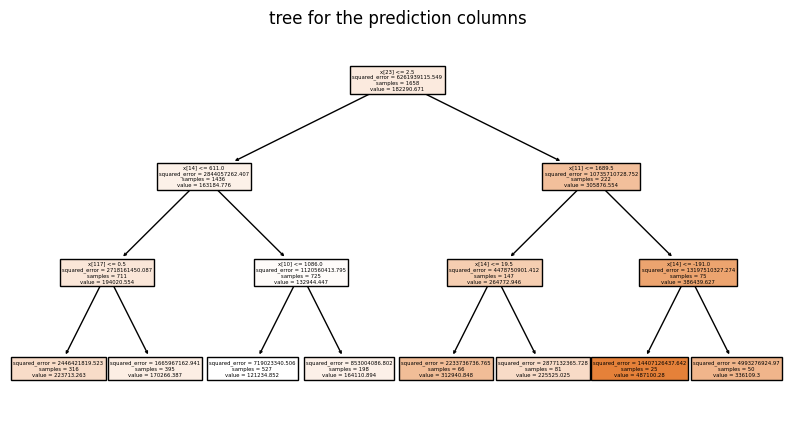

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
clf = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("tree for the prediction columns")




> Outcome


>  1.Linear regression

> r2_score for train=0.92




> r2_score for test=0.88

  
>2.Decision Tree

> The r2 score for train=1

> The r2 score for test=0.84







Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [ ]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_hat_train_rf))
print("The rmse for train is ",round(rmse_train,2))

The rmse for train is  9765.1


In [ ]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_hat_test_rf))
print("The rmse for test is ",round(rmse_test,2))

The rmse for test is  22835.47


In [ ]:
r_squared = r2_score(y_test, y_hat_test_rf)
print("R-squared score:", r_squared)



R-squared score: 0.9107817588120067


In [ ]:
r_squared = r2_score(y_train, y_hat_train_rf)
print("R-squared score:", r_squared)


R-squared score: 0.9847719436454905


Ada Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [ ]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [ ]:
y_hat_train_ada=ada.predict(x_train)
y_hat_test_ada=ada.predict(x_test)

In [ ]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_hat_train_ada))
print("The rmse for train is",round(rmse_train,2))

The rmse for train is 29678.78


In [ ]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_hat_test_ada))
print("The rmse for test is",round(rmse_test,2))

The rmse for test is 35629.07


In [ ]:
r_squared=r2_score(y_train,y_hat_train_ada)
print("r_squared",r_squared)

r_squared 0.8593358796565003


In [ ]:
r_squared=r2_score(y_test,y_hat_test_ada)
print("r_squared",r_squared)

r_squared 0.7828086274508075


# Dimensionality Reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = x_train.shape[1])

In [ ]:
pca.fit(x_train)

PCA(n_components=167)

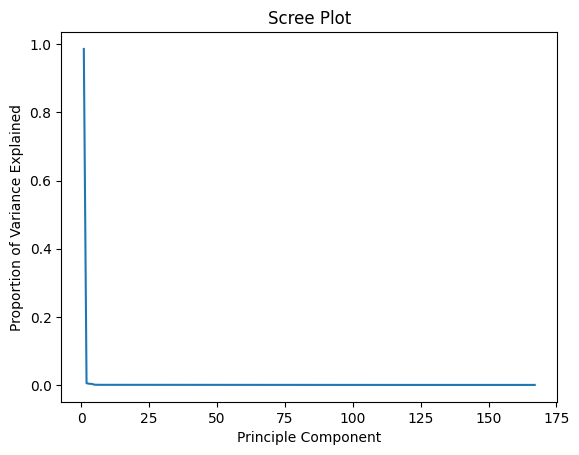

In [ ]:
plt.plot(np.arange(pca.n_components_) +1, pca.explained_variance_ratio_)
plt.xlabel("Principle Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([9.86614014e-01, 5.02407556e-03, 3.41969637e-03, 2.86704791e-03,
       5.68803545e-04, 3.49576468e-04, 3.15303697e-04, 3.09485361e-04,
       2.25213508e-04, 1.49400360e-04, 4.14102363e-05, 3.37701906e-05,
       3.15838459e-05, 2.70015653e-05, 1.22692165e-05, 8.56582548e-06,
       2.55263750e-06, 7.13693912e-08, 1.74738052e-08, 1.65161570e-08,
       1.58074429e-08, 1.00891034e-08, 6.50397411e-09, 5.24258180e-09,
       4.01564594e-09, 3.62019920e-09, 3.47638524e-09, 3.08572514e-09,
       2.94485090e-09, 2.86438387e-09, 2.72782639e-09, 2.66776400e-09,
       2.59262565e-09, 2.39710897e-09, 2.13632566e-09, 2.06841833e-09,
       1.94296364e-09, 1.88437688e-09, 1.77824162e-09, 1.60790719e-09,
       1.59221438e-09, 1.55715258e-09, 1.50384360e-09, 1.47944662e-09,
       1.42724758e-09, 1.33506006e-09, 1.29571887e-09, 1.26796184e-09,
       1.21302957e-09, 1.19562894e-09, 1.09816526e-09, 1.06311416e-09,
       9.99364071e-10, 9.84331764e-10, 9.60368337e-10, 9.35860824e-10,
      

In [ ]:
pca_apply = PCA(n_components= 80)
pca_apply.fit(x_train)
x_train_pca= pca_apply.fit_transform(x_train)
x_test_pca= pca_apply.fit_transform(x_test)

In [ ]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(1658, 80)
(415, 80)


In [ ]:
x_train

,Dwell_Type,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1743,80,9674,7,4,2010,1,442,786,0,82,...,True,False,False,True,False,True,False,False,True,False
1640,20,10942,4,4,1958,41,0,457,374,193,...,False,False,False,True,False,True,False,False,True,False
2028,20,8712,9,4,1980,24,0,860,0,132,...,True,False,False,True,False,True,False,False,True,False
1432,30,10800,9,6,1927,17,0,0,0,656,...,True,False,False,True,False,True,False,False,True,False
1586,85,10786,6,7,1991,21,0,747,93,0,...,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,150,6658,8,6,2003,21,170,686,0,162,...,True,False,False,True,False,True,False,False,True,False
1095,20,9317,6,5,2006,18,0,24,0,1290,...,True,False,False,True,False,True,False,False,True,False
1130,50,7804,4,3,1928,74,0,622,0,500,...,False,False,False,True,False,True,False,False,True,False
1294,20,8172,5,6,1955,34,0,167,0,697,...,True,True,False,False,False,True,False,False,True,False


In [ ]:
x_train_pca

array([[-1.21675139e+03, -3.99975026e+02,  5.90026382e+02, ...,
         7.43083581e-03,  3.50811757e-02,  1.28981026e-02],
       [ 5.42593008e+01, -2.29108384e+02,  4.23767599e+02, ...,
         1.24925685e-01, -2.06595399e-02, -5.84250278e-02],
       [-2.17332688e+03, -1.34855055e+02,  6.59312633e+02, ...,
         1.75423449e-01,  1.36056826e-01, -3.20422330e-02],
       ...,
       [-3.07306633e+03,  5.39831670e+02, -1.13789091e+02, ...,
         1.70620804e-01, -7.17743396e-02,  9.37472633e-02],
       [-2.73013248e+03, -6.70320546e+02,  1.03679465e+02, ...,
         1.00706766e-01,  1.85463356e-02, -2.27600187e-01],
       [-3.25447584e+03, -2.00437219e+02, -5.08881514e+02, ...,
         7.35986065e-03, -3.00789973e-01,  6.46603006e-02]])

# Linear Regression after PCA

In [ ]:
lr_pca=LinearRegression()
lr_pca.fit(x_train_pca,y_train)

LinearRegression()

In [ ]:
y_hat_train_lr_pca=lr_pca.predict(x_train_pca)
y_hat_test_lr_pca=lr_pca.predict(x_test_pca)

In [ ]:
rms_train_lr_pca=np.sqrt(mean_squared_error(y_train,y_hat_train_lr_pca))
print("The Rms for the model is",round(rms_train_lr_pca,2))

The Rms for the model is 28691.09


In [ ]:
rms_test_lr_pca=np.sqrt(mean_squared_error(y_test,y_hat_test_lr_pca))
print("The Rms for the model is",round(rms_test_lr_pca,2))

The Rms for the model is 60579.57


In [ ]:
r2_score_train_lr_pca=(r2_score(y_train,y_hat_train_lr_pca))
print("The R2_score for the model is",round(r2_score_train_lr_pca,2))

The R2_score for the model is 0.87


In [ ]:
r2_score_test_lr_pca=(r2_score(y_test,y_hat_test_lr_pca))
print("The R2_score for the model is",round(r2_score_test_lr_pca,2))

The R2_score for the model is 0.37


Decision Tree Regressor